In [19]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [20]:
df=pd.read_csv(os.path.join('CommentToxicity','jigsaw-toxic-comment-classification-challenge','train.csv','train.csv'))

In [21]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [22]:
from tensorflow.keras.layers import TextVectorization   

In [23]:
X=df['comment_text']
Y=df[df.columns[2:]].values

In [24]:
X.values

array(["Explanation\r\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \r\n\r\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\r\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of 

In [25]:
MAX_FEATURES = 200000 # number of words in the vocab

In [26]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [27]:
vectorizer.adapt(X.values)

In [28]:
vectorized_text = vectorizer(X.values)

In [29]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [30]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [31]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,Y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [32]:
batch_X,batch_Y=dataset.as_numpy_iterator().next()

In [33]:
batch_X.shape

(16, 1800)

In [34]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [35]:
train_generator=train.as_numpy_iterator()

In [36]:
train_generator.next()

(array([[   46,  1295,    10, ...,     0,     0,     0],
        [   18,     8,    19, ...,     0,     0,     0],
        [59916,   188,    48, ...,     0,     0,     0],
        ...,
        [    2,    63,   156, ...,     0,     0,     0],
        [    1,   265,     8, ...,     0,     0,     0],
        [   18,     6, 10211, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [38]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [39]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [24]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 11382s 2s/step - loss: 0.0618 - val_loss: 0.0460


In [29]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

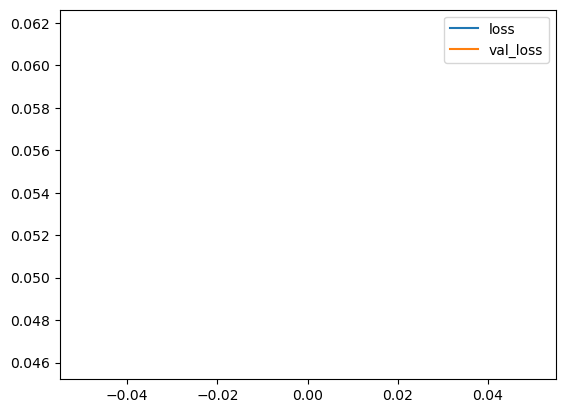

In [30]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [42]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [43]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


In [44]:
(res > 0.5).astype(int)

array([[1, 1, 0, 0, 0, 0]])

In [45]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [46]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 194ms/step


array([[1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [47]:
res.shape

(1, 6)

In [48]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 173ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 163ms/step


In [51]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.06867118179798126, Recall:0.5088319182395935, Accuracy:0.043129388242959976


In [70]:
!pip install gradio jinja2

In [71]:
import tensorflow as tf
import gradio as gr

In [60]:
model.save('toxicity.h5')

In [72]:
model = tf.keras.models.load_model('toxicity.h5')

In [73]:
input_str = vectorizer('hey i happy!')

In [74]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 753ms/step


In [75]:
(res > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0]])

In [76]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [84]:
from gradio import components

In [94]:
# Create the input and output components
input_textbox = components.Textbox(lines=2, placeholder='GR comment toxicity Checker')
output_textbox = components.Textbox(label="Scored Comment")

# Create the Gradio interface
interface = gr.Interface(
    fn=score_comment,
    inputs=input_textbox,
    outputs=output_textbox,
    title=" GR comment toxicity Checker"
)


In [95]:
score_comment('i will kill you')

1/1 [==============================] - 0s 73ms/step


'toxic: True\nsevere_toxic: False\nobscene: True\nthreat: False\ninsult: False\nidentity_hate: False\n'

In [96]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7867

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 [==============================] - 0s 89ms/step
